<a href="https://colab.research.google.com/github/alex-smith-uwec/CS491/blob/main/PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
my_path="/content/drive/MyDrive/CS491/Data/"

# Download a novel and prepare for analysis

Some pre-processing: download novel from Gutenberg, then remove preamble and postamble

In [3]:
title = 'The Golden Bowl'
tit='Bowl'
author = 'Henry James'
url = 'https://www.gutenberg.org/cache/epub/4264/pg4264.txt'
path = my_path

# title = 'The Americans'
# tit='Americans'
# author = 'Henry James'
# url = 'https://www.gutenberg.org/cache/epub/177/pg177.txt'
# path = my_path

In [4]:
import os
# Check if the file is stored locally
filename = my_path+ title
if os.path.isfile(filename) and os.stat(filename).st_size != 0:
        print("{title} file already exists".format(title=title))
        with open(filename, 'r') as f:
            raw = f.read()

else:
    print("{title} file does not already exist. Grabbing from Project Gutenberg".format(title=title))
    response = request.urlopen(url)
    raw = response.read().decode('utf-8-sig')
    print("Saving {title} file".format(title=title))
    with open(filename, 'w') as outfile:
        outfile.write(raw)

The Golden Bowl file already exists


In the file browser to the left, open the book. The text should (might?) appear in a cell on the right. Delete preamble and postamble, then save.

In [5]:
##These two lines demonsrate that you have succeeded in removing the Guttenberg preamble and postamble

print(f"first 100 characters: {raw[:100]}")
print(f"last 100 characters: {raw[-100:]}")

first 100 characters:        The Prince had always liked his London, when it had come to him; he was one of the modern Rom
last 100 characters: angely lighted his eyes that, as for pity and dread of them, she buried her own in his breast.      


In [6]:
# first, remove unwanted new line and tab characters from the text
for char in ["\n", "\r", "\d", "\t"]:
   raw = raw.replace(char, " ")

with open(filename, 'w') as outfile:
    outfile.write(raw)

In [7]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
all_tokens=word_tokenize(raw)#.lower())

In [ ]:
all_tokens[60:80]

In [11]:
clean_tokens=[word for word in all_tokens if word.isalpha()]

In [12]:
clean_tokens[60:80]

['in',
 'the',
 'present',
 'London',
 'much',
 'more',
 'than',
 'in',
 'contemporary',
 'Rome',
 'the',
 'real',
 'dimensions',
 'of',
 'such',
 'a',
 'case',
 'If',
 'it',
 'was']

# Zipf's Law

[Zipf's Law Wiki](https://en.wikipedia.org/wiki/Zipf%27s_law)

In [13]:
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt

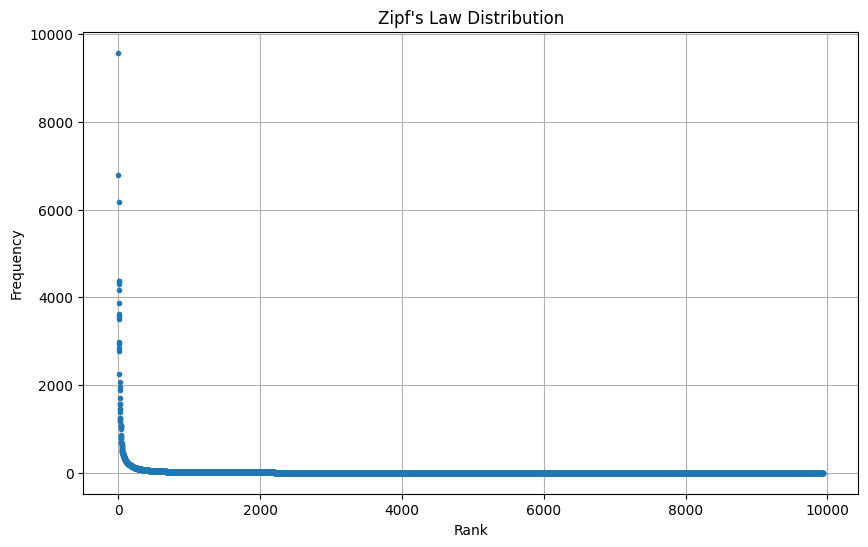

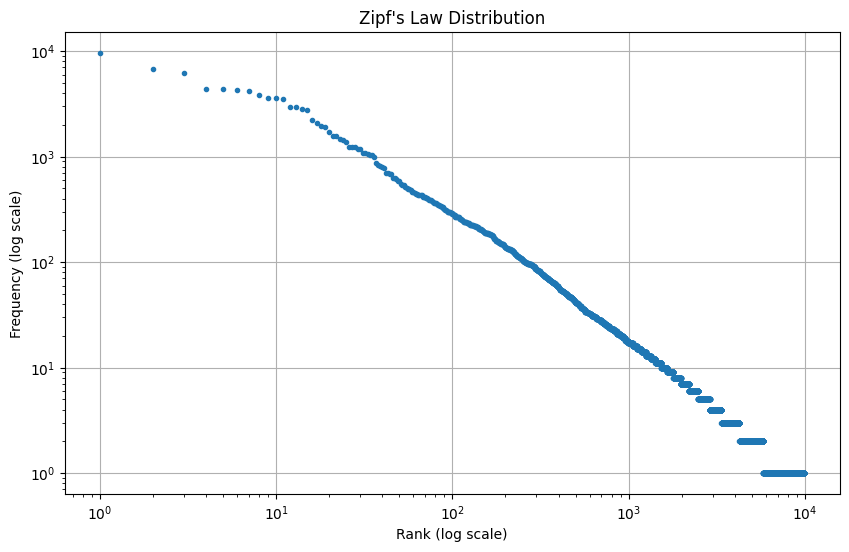

Estimated exponent 's' in Zipf's Law: 1.3265029948536835


In [14]:
##Zipf's Law
clean_tokens_lower = [word.lower() for word in clean_tokens]
word_frequencies = Counter(clean_tokens_lower)
sorted_frequencies = sorted(word_frequencies.values(), reverse=True)

# Create an array of ranks (1, 2, 3, ...)
ranks = np.arange(1, len(sorted_frequencies) + 1)


plt.figure(figsize=(10, 6))
plt.plot(ranks, sorted_frequencies, marker='.', linestyle='None')
plt.title("Zipf's Law Distribution")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot the data on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(ranks, sorted_frequencies, marker='.', linestyle='None')
plt.title("Zipf's Law Distribution")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.grid(True)
plt.show()

from scipy.stats import linregress

# Assuming you have already calculated ranks and sorted_frequencies as mentioned earlier
log_ranks = np.log(ranks)
log_frequencies = np.log(sorted_frequencies)

# Fit a linear regression model to the log-log data
slope, intercept, r_value, p_value, std_err = linregress(log_ranks, log_frequencies)

# The slope of the regression line represents the estimated exponent 's'
estimated_s = -slope

print(f"Estimated exponent 's' in Zipf's Law: {estimated_s}")

# Stopwords, wordcloud, hapaxes, lexical dispersion

In [15]:
from nltk.corpus import stopwords
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
stop_words=stopwords.words('english')

In [19]:
#Note that All_words is case sensitive (later will use all_words)
#A reason for this is to preserve capitalization of proper names in a word cloud
All_words = [word for word in clean_tokens if word.casefold() not in stop_words]

In [20]:
print(All_words[0:20])

['Prince', 'always', 'liked', 'London', 'come', 'one', 'modern', 'Romans', 'find', 'Thames', 'convincing', 'image', 'truth', 'ancient', 'state', 'left', 'Tiber', 'Brought', 'legend', 'City']


In [21]:
All_fd=nltk.FreqDist(All_words)

In [22]:
All_fd

FreqDist({'would': 804, 'Maggie': 693, 'one': 659, 'Charlotte': 593, 'might': 578, 'could': 518, 'little': 464, 'even': 448, 'said': 444, 'made': 437, ...})

In [ ]:
All_fd.most_common(100)

In [24]:
from wordcloud import WordCloud

In [26]:
wordcloud = WordCloud(width = 1000, height = 800,
                      background_color ='white',
                      max_words=200,
                      prefer_horizontal=0.5,
                      random_state=4,
                      contour_color='steelblue').generate_from_frequencies(All_fd)

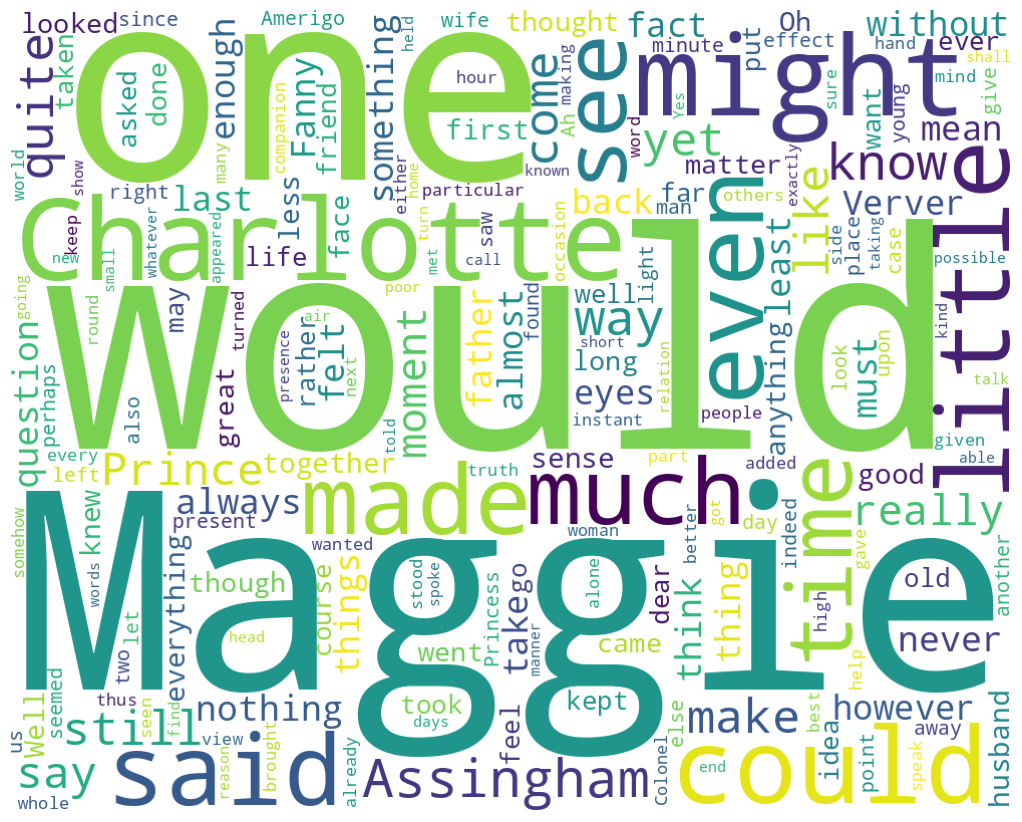

In [28]:
# plot the WordCloud image
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = -0.1)

plt.show()

In [29]:
#Now working with all words lower case
all_words = [word.lower() for word in All_words]

In [30]:
all_fd=nltk.FreqDist(all_words)

In [31]:
single_words=all_fd.hapaxes()

In [32]:
len(single_words)

4118

In [33]:
import random

In [35]:
random.choices(single_words,k=20)

['camp',
 'flit',
 'saloons',
 'tapestries',
 'tangible',
 'quieter',
 'catalogue',
 'uncontrollable',
 'embrued',
 'metal',
 'mamma',
 'obligations',
 'cryptically',
 'sheet',
 'dome',
 'lockets',
 'attributing',
 'sentimentally',
 'disconcert',
 'canicular']

In [36]:
Top_words = [word for (word, freq) in All_fd.most_common(10)]
print(Top_words)

['would', 'Maggie', 'one', 'Charlotte', 'might', 'could', 'little', 'even', 'said', 'made']


In [37]:
from nltk.draw.dispersion import dispersion_plot

<Figure size 1200x900 with 0 Axes>

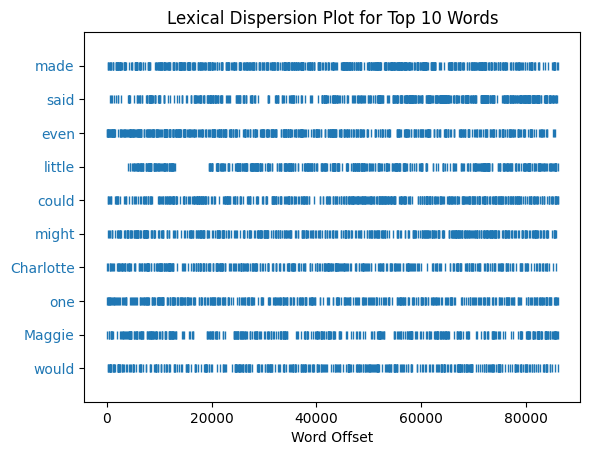

In [38]:
plt.figure(figsize=(12, 9))
dispersion_plot(All_words, Top_words, ignore_case=True, title='Lexical Dispersion Plot for Top 10 Words')
plt.show()

In [39]:
V = set(all_words)
long_words = [w for w in V if len(w) > 12]

In [ ]:
long_words

In [43]:
big_words=sorted(w for w in set(long_words) if len(w) > 10 and all_fd[w] > 7)
len(big_words)

15

In [44]:
print(big_words)

['comparatively', 'complications', 'consciousness', 'consideration', 'demonstration', 'distinguished', 'extraordinarily', 'extraordinary', 'inconsequence', 'instinctively', 'opportunities', 'possibilities', 'responsibility', 'understanding', 'unprecedented']


<Figure size 1200x900 with 0 Axes>

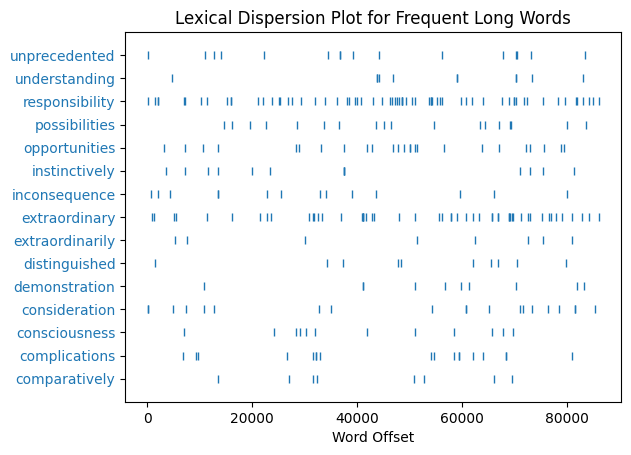

In [45]:
plt.figure(figsize=(12, 9))
dispersion_plot(all_words, big_words, ignore_case=True, title='Lexical Dispersion Plot for Frequent Long Words')
plt.show()

# Bigrams and Trigrams

In [48]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures


finder = BigramCollocationFinder.from_words(clean_tokens)



In [49]:
frequent_bigrams = finder.nbest(BigramAssocMeasures.raw_freq, 100)
print(frequent_bigrams)

[('of', 'the'), ('in', 'the'), ('she', 'had'), ('of', 'her'), ('he', 'had'), ('it', 'was'), ('to', 'be'), ('to', 'the'), ('had', 'been'), ('for', 'the'), ('on', 'the'), ('of', 'his'), ('as', 'if'), ('that', 'she'), ('at', 'the'), ('of', 'a'), ('to', 'her'), ('have', 'been'), ('with', 'the'), ('she', 'was'), ('and', 'the'), ('in', 'her'), ('for', 'her'), ('that', 'he'), ('don', 't'), ('as', 'she'), ('It', 'was'), ('didn', 't'), ('a', 'little'), ('of', 'it'), ('I', 've'), ('all', 'the'), ('of', 'their'), ('would', 'have'), ('the', 'Prince'), ('as', 'a'), ('with', 'a'), ('She', 'had'), ('for', 'a'), ('with', 'her'), ('by', 'the'), ('might', 'have'), ('he', 'was'), ('the', 'same'), ('it', 's'), ('I', 'm'), ('from', 'the'), ('that', 'I'), ('that', 'the'), ('in', 'a'), ('of', 'which'), ('as', 'he'), ('was', 'the'), ('her', 'father'), ('so', 'much'), ('would', 'be'), ('I', 'don'), ('it', 'had'), ('was', 'to'), ('It', 's'), ('her', 'own'), ('in', 'his'), ('was', 'a'), ('to', 'have'), ('what', 

In [50]:
finder.apply_freq_filter(5)  # This filters out bigrams that occur less than 5 times
statistical_bigrams = finder.nbest(BigramAssocMeasures.raw_freq, 5)  # Adjust as needed
# also try bigram_measures.pmi, bigram_measures.chi_sq,likelihood_ratio,student_t,likelihood_ratio
statistical_bigrams


[('of', 'the'), ('in', 'the'), ('she', 'had'), ('of', 'her'), ('he', 'had')]

In [51]:
len(statistical_bigrams)

5

In [53]:

from nltk import bigrams
from nltk.probability import ConditionalFreqDist

def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        # Get the most frequent next words (up to 3)
        next_words = list(cfdist[word].keys())[:3]
        if next_words:
            # Randomly choose from the top 3 words
            word = random.choice(next_words)
        else:
            break

# Your existing list of words
# clean_tokens = ["your", "list", "of", "word", "tokens", "here", "..."]  # Replace with your token list

# Generate bigrams from your list of words
clean_bigrams = bigrams(clean_tokens)

# Create a Conditional Frequency Distribution (CFD) from these bigrams
cfd = ConditionalFreqDist(clean_bigrams)

# Example usage
generate_model(cfd, 'She')  # Replace 'your_seed_word' with your desired starting word


She had come of the Thames a case the modern machineries and lumpish in the 

In [54]:
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder



# Create a trigram measures object
trigram_measures = TrigramAssocMeasures()

# Create a Trigram finder
finder = TrigramCollocationFinder.from_words(clean_tokens)

# You can then find trigrams using different measures, e.g., by raw frequency
trigrams = finder.nbest(trigram_measures.raw_freq, 10)  # top 10 trigrams
# trigrams = finder.nbest(trigram_measures.pmi, 20)  # top 10 trigrams
# trigrams=finder.nbest(trigram_measures.likelihood_ratio,20)

# Print trigrams
for trigram in trigrams:
    print(trigram)


('I', 'don', 't')
('might', 'have', 'been')
('one', 'of', 'the')
('would', 'have', 'been')
('at', 'any', 'rate')
('in', 'the', 'world')
('that', 'she', 'had')
('as', 'if', 'she')
('was', 'as', 'if')
('that', 'he', 'had')


In [59]:
from nltk import trigrams


def generate_model(cfdist, word1, word2, num=15):
    print(word1, word2, end=' ')
    for i in range(num - 2):  # Adjust the range since two words are already printed
        next_words = list(cfdist[(word1, word2)].keys())[:3]
        if next_words:
            next_word = random.choice(next_words)
            print(next_word, end=' ')
            word1, word2 = word2, next_word
        else:
            break


# Your existing list of words
# clean_tokens = ["your", "list", "of", "word", "tokens", "here", "..."]

# Generate trigrams from your list of words
clean_trigrams = trigrams(clean_tokens)

# Create a Conditional Frequency Distribution (CFD) from these trigrams
cfd = ConditionalFreqDist(((w1, w2), w3) for w1, w2, w3 in clean_trigrams)

# Example usage, with two seed words
generate_model(cfd, 'The', 'only')  # Replace with your desired starting words


The only thing is Maggie added in a condition and yet by your answer to 

In [ ]:
#